In [1]:
import numpy as np
import torch

from envs.IBGym_mod_envs import IBGymQ
from state_quantization.transforms import NormalizeTransform
from dynamic_programming.mdp_model import DPPolicy
import matplotlib.pyplot as plt

In [2]:
device = 'cpu'


model_path = 'state_quantization/model'

model = torch.load(model_path).to(device)
model.eval()
model.look_ahead = 0
print(model.hidden_size)
normalize_dataset = NormalizeTransform.load('state_quantization/NormalizeInputConfigs.pkl')
normalize_dataset.to(device)

env = IBGymQ(q_model=model,device=device, setpoint=70, reward_type='classic', action_type='discrete', observation_type='include_past',
             reset_after_timesteps=1000, n_past_timesteps=model.seq_len, normalize_transformer=normalize_dataset)

policy_save_path = 'dynamic_programming/ib_policy.pkl'
policy = DPPolicy.load(policy_save_path)

10


/home/hamza/PycharmProjects/StateCompression/venv/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [3]:
policy.policy_table

array([2, 0, 1])

In [4]:
total_epochs = 0
episodes = 25
avg_ep_reward = 0

without_random_action_rewards = []
with_random_action_rewards = []
states_each_ep = []
for i in range(episodes):
    print(f'Episode: {i}')
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0

    done = False
    total_rewards = 0
    random_action = False

    #states_enc = set()
    states = []
    while not done:
        states.append(state)
        if state in policy.state_to_index:
            action = policy.get_action(state)
        else:
            action = env.action_space.sample()
            random_action = True
        state, reward, done, info = env.step(action)


        epochs += 1

        total_rewards += reward
    if random_action:
        with_random_action_rewards.append(total_rewards/env.reset_after_timesteps)
        print('random action taken')
    else:
        without_random_action_rewards.append(total_rewards/env.reset_after_timesteps)
    states_each_ep.append(states)
    print((total_rewards/env.reset_after_timesteps))
    avg_ep_reward += (total_rewards/env.reset_after_timesteps)
    total_epochs += epochs
    print(f'States this episode: {np.unique(states_each_ep[-1]).size}')

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average Reward per episode: {avg_ep_reward / episodes}")


Episode: 0
-235.92137662906805
States this episode: 3
Episode: 1
-235.12415789878816
States this episode: 3
Episode: 2
-237.1382161969939
States this episode: 3
Episode: 3
-236.0724342076397
States this episode: 3
Episode: 4
-235.13323910434093
States this episode: 3
Episode: 5
-236.14906110840136
States this episode: 3
Episode: 6
-235.50312222855516
States this episode: 3
Episode: 7
-235.78552872599255
States this episode: 3
Episode: 8
-235.4544937618111
States this episode: 3
Episode: 9
-235.52990032585598
States this episode: 3
Episode: 10
-235.7924632562586
States this episode: 3
Episode: 11
-235.80764679234704
States this episode: 3
Episode: 12
-237.06160650319546
States this episode: 3
Episode: 13
-235.36894389757936
States this episode: 3
Episode: 14
-235.29248688714046
States this episode: 3
Episode: 15
-236.05711616622662
States this episode: 3
Episode: 16
-235.12849449161388
States this episode: 3
Episode: 17
-236.98255254631738
States this episode: 3
Episode: 18
-235.8947408

In [5]:
print(f'Average Reward with random actions {sum(with_random_action_rewards)/len(with_random_action_rewards)}')
print(f'Average Reward without random actions {sum(without_random_action_rewards)/len(without_random_action_rewards)}')

ZeroDivisionError: division by zero

In [ ]:
without_random_action_rewards

In [11]:
un, inv = np.unique(states_each_ep,return_inverse=True)
inv = np.array(np.split(inv, len(states_each_ep)))

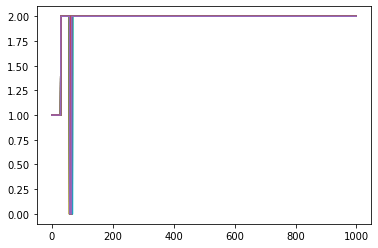

In [12]:
for ep in inv:
    plt.plot(ep)
plt.show()